## purpose of this notebook
* look at several PSDs for each of the series types
* find some high-correlation within-group pairs and find out which frequencies contribute to the correlation


### some conclusions and next steps
* plotting cumulative "specific contribution" and "total contribution" along the frequency axis helps in understanding the sources of correlation. need to be done systematically.
* Some group of size three have similar correlation coefficients and some have very different correlation coefficient - this seems like an interesting path to explore further
* Need to write functions for:
    * Normalization
    * group-wise analyses
* need to verify the conclusion that the range where correlation appears is up to the frequency 0.2 (cycle of 5 seconds). 
* verify that I can get the correlation coefficient calculated from the fourier spectrum. if so - caluclate the coefficient based on the minimalist frequency range where the correlation actually occurs. see if this creates stronger correlations
* use the idea to visualize the 3 correlations in 2d, see if this pops something out - both the raw correlations and the limited-frequency-range correlations.
* cross correlation peak location - I don't expect much but can be checked - need to verify that the normalization doesn't create a bias.

In [1]:
import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(gdd);
reload(anaz);

In [2]:
con = gdd.get_db_data()

In [3]:
part = con.get_participants()

In [4]:
con.participants[:8]

[(1001, 101),
 (1001, 102),
 (1001, 103),
 (1003, 108),
 (1003, 109),
 (1004, 110),
 (1004, 111),
 (1004, 112)]

In [5]:
part[:4]

[(1001, 101), (1001, 102), (1001, 103), (1003, 108)]

In [6]:
gr = {}
for p in part:
    gr[p[0]] = gr.get(p[0],[])+[p[1]]

In [12]:
gr

{1001: [101, 102, 103],
 1003: [108, 109],
 1004: [110, 111, 112],
 1005: [113, 114, 115],
 1006: [116, 117, 118],
 1007: [119, 120, 121],
 1008: [122, 123, 124],
 1009: [125, 126, 127],
 1010: [128, 129, 130],
 1011: [131, 132, 133],
 1012: [134, 135, 136],
 1013: [137, 138, 139],
 1014: [140, 141, 142],
 1015: [144, 145],
 1016: [146, 147, 148],
 1017: [149, 151],
 1019: [155, 156, 157],
 1020: [158, 159, 160],
 1022: [164, 165, 166],
 1023: [167, 168, 169],
 1024: [170, 171, 172],
 1025: [173, 174, 175],
 1026: [176, 177, 178],
 1027: [179, 180, 181],
 1028: [182, 183, 184],
 1029: [185, 186, 187],
 1030: [188, 189, 190],
 1031: [191, 192, 193],
 1032: [194, 195, 196],
 1033: [200, 201, 202],
 1034: [203, 204, 205],
 1035: [206, 207, 208],
 1036: [209, 210, 211],
 1037: [212, 213, 214],
 1038: [215, 216, 217],
 1039: [218, 219, 220],
 1040: [221, 222, 223],
 1041: [224, 225, 226],
 1042: [227, 228, 229],
 1043: [230, 231, 232],
 1044: [233, 234, 235],
 1045: [236, 237, 238],
 1046: 

In [7]:
grk = list(gr.keys())
grk1 = grk[::3]
bl_signals = dict(zip(grk1, list(con.get_signal_by_series_type_and_interp_type(grk1,1,4))))
i_signals = dict(zip(grk1, list(con.get_signal_by_series_type_and_interp_type(grk1,2,4))))

#i_signals[k] = list(con.get_signal_by_series_type_and_interp_type(k,2,4))

In [52]:
signals_by_part= {}
for k, v in i_signals.items():
    parts = np.unique(v[:,0])
    for par in parts:
        signals_by_part[int(par)]=v[v[:,0]==par,2]

In [53]:
signals_by_part[115]

array([0.52183, 0.51854, 0.51442, ..., 0.49663, 0.50173, 0.50105])

In [54]:
corrs = {}
for k in grk1:
    v = gr[k]
    print(k,v)
    try:
        c = np.corrcoef([signals_by_part[p] for p in v])
    
        if len(v)==3:
            corrs[k] = np.around(np.array([c[0,1],c[0,2],c[1,2]]),4)
        else:
            corrs[k]= [c[0,1]]
    except ValueError:
        corrs[k] = 'error'
    


1001 [102, 103]
1005 [113, 114, 115]
1008 [122, 123, 124]
1011 [131, 132, 133]
1014 [140, 141, 142]
1017 [149, 151]
1022 [164, 165, 166]
1025 [173, 174, 175]
1028 [182, 183, 184]
1031 [191, 192, 193]
1034 [203, 204, 205]
1037 [212, 213, 214]
1040 [221, 222, 223]
1043 [230, 231, 232]
1046 [239, 240, 241]
1049 [248, 249, 250]


In [55]:
corrs

{1001: [0.24079246301159862],
 1005: array([-0.1118,  0.3002, -0.1844]),
 1008: array([0.374 , 0.2376, 0.3153]),
 1011: array([0.3584, 0.1491, 0.0357]),
 1014: array([0.2149, 0.2337, 0.3082]),
 1017: [0.16993182684259092],
 1022: array([-0.1209,  0.2176,  0.1822]),
 1025: array([0.333 , 0.263 , 0.3046]),
 1028: array([ 0.2304, -0.0841, -0.1174]),
 1031: array([-0.0037,  0.5554,  0.1255]),
 1034: array([-0.0564, -0.0717,  0.0292]),
 1037: array([0.1217, 0.1004, 0.0248]),
 1040: array([ 0.1118, -0.0531, -0.1887]),
 1043: array([ 0.1478,  0.2926, -0.2776]),
 1046: array([0.1886, 0.2442, 0.1895]),
 1049: array([ 0.0429, -0.0239,  0.3207])}

(-0.5, 0.5)

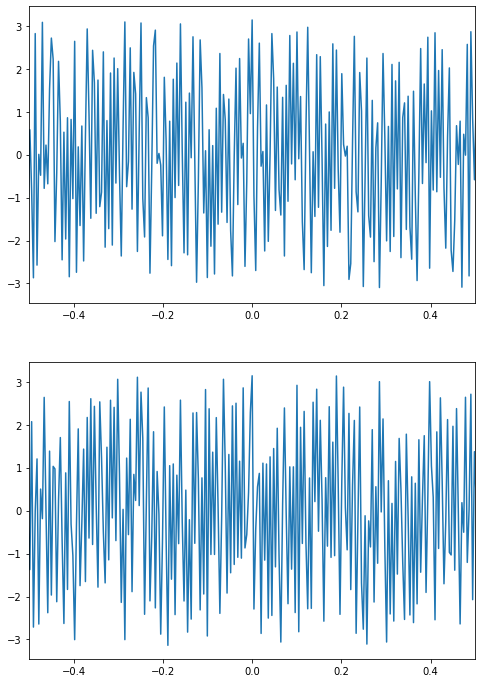

In [62]:
s1= anaz.psd(signals_by_part[173],0.25)
s2= anaz.psd(signals_by_part[174],0.25)

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.plot(s1.freq,s1.phase)
plt.xlim(-0.5, 0.5)

plt.subplot(2,1,2)
plt.plot(s2.freq,s2.phase)
plt.xlim(-0.5, 0.5)

array([[1.        , 0.23534721],
       [0.23534721, 1.        ]])

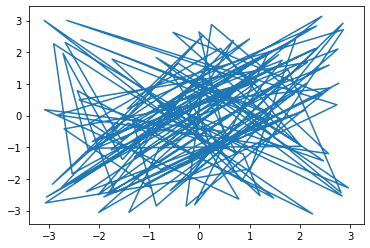

In [75]:
_and = np.logical_and
ff = _and(s1.freq>0, s1.freq <= 0.5)
plt.plot(s1.phase[ff],s2.phase[ff],'-')
np.corrcoef(s1.phase[ff],s2.phase[ff])

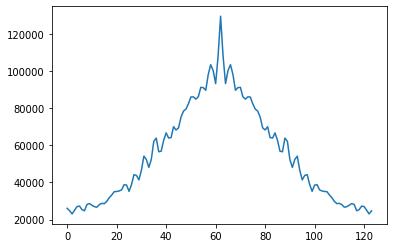

In [82]:
plt.plot(np.abs(np.correlate(s2.psd[ff],s2.psd[ff],'same')))

In [85]:
np.bincount(np.digitize(np.mod(s2.phase[ff]-s1.phase[ff],np.pi),np.linspace(0,np.pi,10))) 

array([ 0, 18, 17, 12, 15, 12, 15,  7, 14, 14])

(-0.5, 0.5)

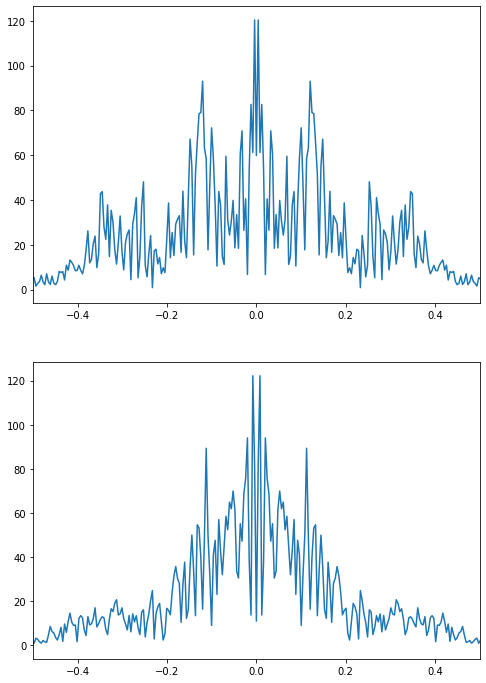

In [63]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.plot(s1.freq,s1.psd)
plt.xlim(-0.5, 0.5)

plt.subplot(2,1,2)
plt.plot(s2.freq,s2.psd)
plt.xlim(-0.5, 0.5)

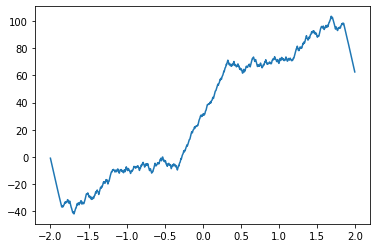

In [58]:
plt.plot(s1.freq,np.cumsum(np.cos(s2.phase-s1.phase)))

(-0.5, 0)

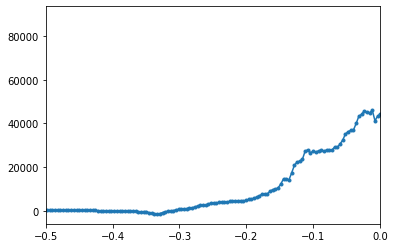

In [101]:
plt.plot(s1.freq,np.cumsum(s1.psd*s2.psd*np.cos(s2.phase-s1.phase)),'.-')
plt.xlim(-0.5,0)

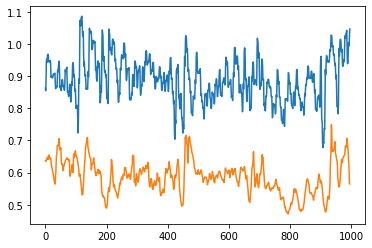

In [64]:
plt.plot(signals_by_part[173])
plt.plot(signals_by_part[174])

(-2.5, 2.5)

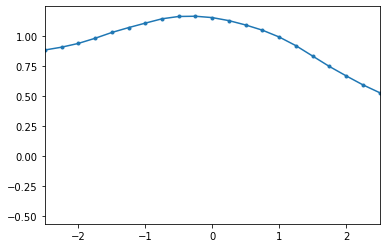

In [98]:
debias = lambda x: x - x.mean() 
l = len(signals_by_part[173])
lag = np.arange(-l/2,l/2)*0.25
ccf = np.correlate(debias(signals_by_part[173]),debias(signals_by_part[174]),'same')
#print(len(lag),len(ccf),l)
plt.plot(lag, ccf,'.-')
plt.xlim(-2.5,2.5)

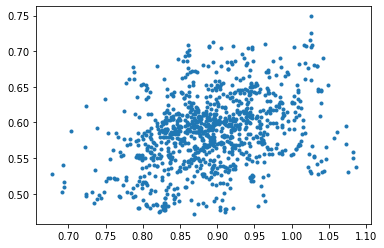

In [66]:
plt.plot(signals_by_part[173],signals_by_part[174],'.')

In [21]:
np.corrcoef([signals_by_part[113],signals_by_part[114],signals_by_part[115]])

array([[ 1.        ,  0.1829891 , -0.08374719],
       [ 0.1829891 ,  1.        ,  0.07286242],
       [-0.08374719,  0.07286242,  1.        ]])

In [39]:
np.corrcoef(signals_by_part[204],signals_by_part[205])

array([[1.        , 0.30092095],
       [0.30092095, 1.        ]])